In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [43]:
df = pd.read_csv('FakeNewsNet.csv')

In [44]:
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [45]:
df.describe()

,tweet_num,real
count,23196.000000,23196.000000
mean,88.956803,0.751897
std,488.694592,0.431921
min,0.000000,0.000000
25%,11.000000,1.000000
50%,37.000000,1.000000
75%,65.000000,1.000000
max,29060.000000,1.000000


In [46]:
df.sample(5)

,title,news_url,source_domain,tweet_num,real
12426,Javi Marroquin & Briana DeJesus Kiss In New PD...,https://hollywoodlife.com/2017/12/04/briana-de...,hollywoodlife.com,1,1
15019,Kylie Jenner Has Major Regrets Over Pregnancy ...,hollywoodlife.com/2018/01/29/kylie-jenner-regr...,hollywoodlife.com,41,0
12639,Romeo Santos Proudly Unveils His Wax Figure Af...,https://gossipbucket.com/e-online/1188463/rome...,gossipbucket.com,105,1
1985,Stephen Fry Reveals He Has 'Aggressive' Prosta...,https://people.com/health/stephen-fry-reveals-...,people.com,48,1
4665,"All the Inside Gossip, Drama and Tears from th...",https://www.wmagazine.com/story/cfda-awards-20...,www.wmagazine.com,57,1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23196 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  22866 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB


In [48]:
df.duplicated().sum()

np.int64(137)

In [49]:
df = df.drop_duplicates()

In [50]:
df = df.drop(['news_url'],axis=1)

In [51]:
# sns.countplot(x=df['source_domain'])
# plt.show()

In [52]:
df = df.drop(['source_domain'],axis=1)

In [53]:
df = df.drop(['tweet_num'], axis=1)

In [54]:
# sns.scatterplot(df['tweet_num'])
# plt.show()

In [55]:
df['real'].unique()

array([1, 0])

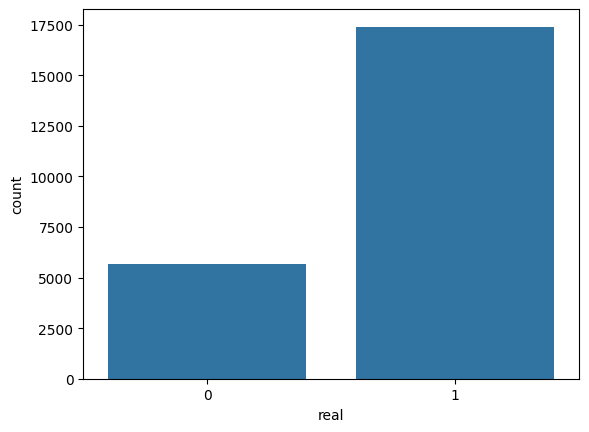

In [56]:
sns.countplot(x=df['real'])
plt.show()

In [57]:
df['title'][:6]

,title
0,Kandi Burruss Explodes Over Rape Accusation on...
1,People's Choice Awards 2018: The best red carp...
2,Sophia Bush Sends Sweet Birthday Message to 'O...
3,Colombian singer Maluma sparks rumours of inap...
4,Gossip Girl 10 Years Later: How Upper East Sid...
5,Gwen Stefani Got Dumped by Blake Shelton Over ...


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23059 entries, 0 to 23195
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23059 non-null  object
 1   real    23059 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 540.4+ KB


In [59]:
df['text'] = df['title']
df['category'] = df['real']

In [60]:
df = df.drop(['title','real'], axis=1)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23059 entries, 0 to 23195
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      23059 non-null  object
 1   category  23059 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 540.4+ KB


In [62]:
df.isna().sum()

,0
text,0
category,0


In [63]:
df.isnull().sum()

,0
text,0
category,0


In [64]:
df = pd.DataFrame(df)

In [65]:
empty = []

for i , t in df['text'].items():
    if isinstance(t,str) and t.isspace():
        empty.append(i)

print(f"empty strings: {len(empty)}")


empty strings: 0


In [66]:
import spacy

nlp = spacy.load('en_core_web_sm')

def clean_text(texts):
    for text in texts:
        doc = nlp(text)
        clean_lemat = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.like_num]
    return " ".join(clean_lemat)

df['text'] = df['text'].apply(clean_text)

In [67]:
df['text'].sample(6)

,text
22898,t
17891,
1011,n
6292,g
3752,
20242,


In [68]:
y = df['category']

In [69]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")

tokenizer.fit_on_texts(df['text'])

sequences = tokenizer.texts_to_sequences(df['text'])

max_length = 500

X = pad_sequences(sequences, maxlen=max_length , padding='post')

In [70]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=69,stratify=y)

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding , LSTM , Dense , Dropout

model = Sequential([
    Embedding(vocab_size , 64 , input_length=max_length),

    LSTM(128, dropout=0.2, recurrent_dropout=0.2),

    Dense(1 , activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [72]:
history = model.fit(X_train , y_train , epochs=10 , validation_data=(X_test, y_test))

Epoch 1/10
269/577 ━━━━━━━━━━━━━━━━━━━━ 7:43 2s/step - accuracy: 0.7504 - loss: 0.5754

KeyboardInterrupt: 